### Do your imports!

In [13]:
import pandas as pd

df = pd.read_csv("subset.csv", nrows=1000000)


# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [14]:
#Done obove

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Unique Key              1000000 non-null  int64 
 1   Created Date            1000000 non-null  object
 2   Closed Date             996296 non-null   object
 3   Agency                  1000000 non-null  object
 4   Agency Name             1000000 non-null  object
 5   Complaint Type          1000000 non-null  object
 6   Descriptor              995955 non-null   object
 7   Location Type           698311 non-null   object
 8   Incident Zip            975646 non-null   object
 9   Incident Address        876798 non-null   object
 10  Address Type            996949 non-null   object
 11  City                    975730 non-null   object
 12  Status                  1000000 non-null  object
 13  Borough                 999963 non-null   object
 14  Open Data Channel T

### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [ ]:
# DONE above

## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [15]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   unique_key              1000000 non-null  int64 
 1   created_date            1000000 non-null  object
 2   closed_date             996296 non-null   object
 3   agency                  1000000 non-null  object
 4   agency_name             1000000 non-null  object
 5   complaint_type          1000000 non-null  object
 6   descriptor              995955 non-null   object
 7   location_type           698311 non-null   object
 8   incident_zip            975646 non-null   object
 9   incident_address        876798 non-null   object
 10  address_type            996949 non-null   object
 11  city                    975730 non-null   object
 12  status                  1000000 non-null  object
 13  borough                 999963 non-null   object
 14  open_data_channel_t

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [16]:
df.created_date.dt.year
#Error
df.closed_date.dt.year

#Error


AttributeError: Can only use .dt accessor with datetimelike values

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [37]:
df['create_date_dtime'] = pd.to_datetime(df.created_date, format="%m/%d/%Y %I:%M:%S %p")
df.create_date_dtime


0        2019-01-27 19:26:21
1        2019-01-29 11:06:56
2        2019-02-13 12:28:18
3        2019-02-13 15:40:19
4        2019-02-13 13:18:31
                 ...        
999995   2019-09-22 11:30:00
999996   2019-09-22 11:50:00
999997   2019-09-22 11:41:00
999998   2019-09-22 20:15:00
999999   2019-09-21 16:25:00
Name: create_date_dtime, Length: 1000000, dtype: datetime64[ns]

In [39]:
df['closed_date_dtime'] = pd.to_datetime(df.closed_date, format="%m/%d/%Y %I:%M:%S %p")
df.closed_date_dtime


0        2019-02-13 10:53:25
1        2019-02-13 02:07:22
2        2019-03-15 09:54:50
3        2019-02-20 06:18:35
4        2019-02-20 05:36:54
                 ...        
999995   2019-09-28 12:00:00
999996   2019-09-26 12:00:00
999997   2019-09-25 12:00:00
999998   2019-09-26 16:15:00
999999   2019-09-21 16:25:00
Name: closed_date_dtime, Length: 1000000, dtype: datetime64[ns]

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [40]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [41]:
# use .dt bcoz I only want to select particular data

df.create_date_dtime.dt.month.value_counts()

#June

5     217373
3     202725
4     194527
6     135362
2     108807
8      52993
9      36811
7      18373
1      15925
12      7723
11      5096
10      4285
Name: create_date_dtime, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [42]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [43]:
# use .resample bcoz I only want to select summerize particular data

df.resample('M', on='create_date_dtime').size().sort_values()

create_date_dtime
2019-10-31         6
2010-01-31       105
2010-10-31       108
2010-02-28       112
2011-11-30       112
               ...  
2019-02-28    104654
2019-06-30    131368
2019-04-30    190340
2019-03-31    198596
2019-05-31    213281
Length: 118, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [44]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

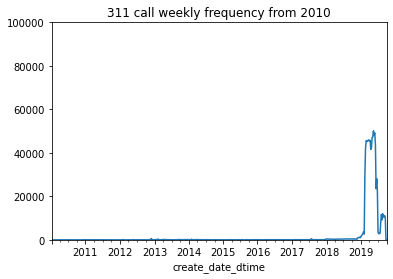

In [45]:
# use .resample bcoz I only want to select summerize particular data

weekly_chart = df.resample('W', on='create_date_dtime').size().plot(ylim=[0,100000], title = "311 call weekly frequency from 2010")



## What time of day (by hour) is the least common for 311 complains? The most common? 







In [46]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [47]:
# use .resample bcoz I only want to select summerize particular data
# df.resample('H', on='create_date_dtime').size().sort_values()

# df.create_date_dtime.dt.month.value_counts()




df.create_date_dtime.dt.hour.value_counts()

# least common: 4am, most common:12am ????really???????


10    72823
11    71500
9     69377
12    66077
14    64919
13    62437
15    61023
16    54615
8     51184
17    46215
18    42707
21    42292
22    41916
19    41075
20    41063
23    35658
0     33834
7     29784
1     18409
6     17038
2     11190
5      9042
3      8415
4      7407
Name: create_date_dtime, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [48]:
df.agency.value_counts().head(5)

# NYPD                                       7714187
# HPD                                        6762860
# DOT                                        3468756
# DSNY                                       2189273
# DEP                                        2003413

NYPD    261669
HPD     217064
DSNY    158866
DOT     124911
DOB     111584
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

NYPD: New York City Police Department
HPD:New York City Department of Housing Preservation and Development
DOT:New York City Department of Transportation
DSNY:New York City Department of Sanitation
DEP: New York City Department of Environmental Protection

## What is the most common complaint to HPD?

In [50]:
# Why did you pick these columns to calculate the answer?

In [51]:
# I used complaint_type because this captures each category of complaints

HPD_df = df[df.agency == 'HPD']
HPD_df.head()

HPD_df.complaint_type.value_counts().head(5)
#HEAT/HOT WATER 

HEAT/HOT WATER          64948
UNSANITARY CONDITION    34737
PAINT/PLASTER           22921
PLUMBING                21782
DOOR/WINDOW             15316
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   unique_key              1000000 non-null  int64         
 1   created_date            1000000 non-null  object        
 2   closed_date             996296 non-null   object        
 3   agency                  1000000 non-null  object        
 4   agency_name             1000000 non-null  object        
 5   complaint_type          1000000 non-null  object        
 6   descriptor              995955 non-null   object        
 7   location_type           698311 non-null   object        
 8   incident_zip            975646 non-null   object        
 9   incident_address        876798 non-null   object        
 10  address_type            996949 non-null   object        
 11  city                    975730 non-null   object        
 12  status         

In [53]:
# 3   agency

df.groupby(level= 0).complaint_type.value_counts().head(3)

   complaint_type              
0  GENERAL                         1
1  PAINT/PLASTER                   1
2  DOF Property - Payment Issue    1
Name: complaint_type, dtype: int64

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [54]:
# Why did you pick these columns to calculate the answer?
df.complaint_type.value_counts()

Request Large Bulky Item Collection    77930
Noise - Residential                    75828
HEAT/HOT WATER                         64948
Illegal Parking                        60343
Street Condition                       44055
                                       ...  
../WEB-INF/web.xml                         1
c:\windows\win.ini Misc. Co...             1
Misc. Comments|echo 3p7wexz...             1
Misc. Comments;declare @q v...             1
Poison Ivy                                 1
Name: complaint_type, Length: 290, dtype: int64

In [55]:
res_noise_df = df[df.complaint_type == "Noise - Residential"]

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [56]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:>

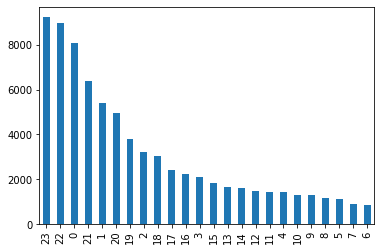

In [57]:
res_noise_df.create_date_dtime.dt.hour.value_counts().plot(kind= 'bar')


## <span style="color: red; ">When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [58]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other
res_noise_df.descriptor.isna().sum()

0

In [127]:
res_noise_df_nan = res_noise_df.dropna()

df[res_noise_df_nan.descriptor.str.endswith('Party')]

# IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).
# comebacklater...


# df[res_noise_df_nan['descriptor'] == 'Party']

# IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).


# .create_date_dtime.dt.month.value_counts().plot(kind = 'bar')


C:\Users\nao22\AppData\Local\Temp/ipykernel_26792/1591262089.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[res_noise_df_nan.descriptor.str.endswith('Party')]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [60]:
bee_df = df[df.complaint_type.str.contains('bee', case= False)]
bee_df.complaint_type.value_counts()

Harboring Bees/Wasps    16
Name: complaint_type, dtype: int64

### <span style="color: red; ">What month do most of the complaints happen in? I'd like to see a graph.


<AxesSubplot:>

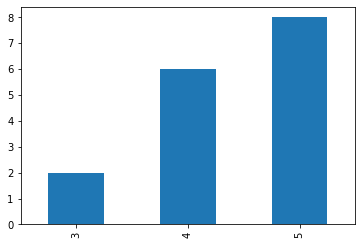

In [61]:
# df.create_date_dtime.dt.month.value_counts()

bee_df.create_date_dtime.dt.month.value_counts().sort_values().plot(kind= 'bar')


# bee_df.create_date_dtime.dt.month.value_counts().sort_values(axis = "created_date").plot(kind= 'bar')
# bee_df.create_date_dtime.dt.month.value_counts().sort_values(by = "created_date").plot(kind= 'bar')

#how can I sort this graph by month????

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [62]:
# bee_df.complaint_type.str.contains('not beekeeper', case= False).value_counts()


bee_df.descriptor.value_counts()
#Not beekeeper

Bees/Wasps - Not a beekeper    9
Beekeeping - Honeybees         7
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?
    
   
Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [63]:
# #there is no NaN in create_date_dtime
df.closed_date_dtime.isna().value_counts()

False    996296
True       3704
Name: closed_date_dtime, dtype: int64

In [64]:
# df.closed_date_dtime = df.closed_date_dtime.fillna(0)

In [65]:
# df.closed_date_dtime.tail(2)

# 27098879    2019-02-15 15:55:51
# 27098880    2019-02-15 15:25:09

df.create_date_dtime.tail(2)

999998   2019-09-22 20:15:00
999999   2019-09-21 16:25:00
Name: create_date_dtime, dtype: datetime64[ns]

In [77]:
# df.closed_date_dtime = pd.to_datetime(df.closed_date_dtime, format="%Y-%m-%d %H:%M:%S", errors='coerce')

time_diff = df['closed_date_dtime'] - df['create_date_dtime']
time_diff

0        16 days 15:27:04
1        14 days 15:00:26
2        29 days 21:26:32
3         6 days 14:38:16
4         6 days 16:18:23
               ...       
999995    6 days 00:30:00
999996    4 days 00:10:00
999997    3 days 00:19:00
999998    3 days 20:00:00
999999    0 days 00:00:00
Length: 1000000, dtype: timedelta64[ns]

In [81]:
time_diff.dt.total_seconds().median()

112740.0

Save it as a new column called `time_to_fix`

In [79]:
df['time_to_fix'] = time_diff.dt.total_seconds()

## Which agency has the best time-to-fix time?

In [85]:
#'time_to_fix' is new column

df.groupby(by='agency').time_to_fix.median().sort_values()

# DHS        average 4383.0 seconds

agency
DHS         4383.0
NYPD        9169.0
DOT        75079.0
DEP        81000.0
DSNY      206880.0
DPR       246154.0
DOHMH     297188.0
DCA       307787.5
DOE       349783.5
HPD       528153.0
DOB       651991.5
DOF       947468.5
DFTA     1057014.5
DOITT    1260712.0
EDC      1644113.0
TLC      3912543.0
ACS            NaN
COIB           NaN
DCAS           NaN
DCP            NaN
DVS            NaN
TAX            NaN
Name: time_to_fix, dtype: float64

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [86]:
df.groupby(by='agency').describe()
#??

unique_key                                                        \
            count          mean            std         min          25%   
agency                                                                    
ACS         117.0  4.229530e+07  409307.200900  41710210.0  41912271.00   
COIB          4.0  4.258125e+07  267808.693280  42258386.0  42415141.25   
DCA        4230.0  4.223952e+07  349133.676776  41694820.0  41948825.75   
DCAS        280.0  4.229537e+07  401178.622136  41700997.0  41959548.25   
DCP           9.0  4.238449e+07  521249.148342  41717530.0  41947840.00   
DEP       88316.0  4.273694e+07  650598.534150  41694432.0  42148216.00   
DFTA       2286.0  4.221565e+07  332550.747526  41694656.0  41934018.50   
DHS         482.0  4.231365e+07  348583.814400  41696926.0  42133341.75   
DOB      111584.0  4.255037e+07  549188.211816  41694637.0  42167162.50   
DOE         330.0  4.218857e+07  315392.072314  41701499.0  41930192.75   
DOF        2370.0  4.214712e+07  295299.966673  41694422.0  41930082.75   
DOHMH     10581.0  4.212104e+07  316203.192180  41694471.0  41912981.00   
DOITT       151.0  4.222443e+07  331098.546447  41699271.0  41947843.50   
DOT      124911.0  4.262654e+07  621244.321284  41694423.0  42066821.50   
DPR       13343.0  4.231605e+07  363149.456639  41694528.0  42003989.50   
DSNY     158866.0  4.254017e+07  538225.976355  41694433.0  42068088.25   
DVS         120.0  4.290163e+07    3419.229774  42895943.0  42898976.75   
EDC         148.0  4.201400e+07  135675.236036  41698232.0  41924544.00   
HPD      217064.0  4.236460e+07  561193.966587  41694420.0  41891729.25   
NYPD     261669.0  4.234910e+07  379230.257567  41694443.0  42022208.00   
TAX          86.0  4.235259e+07  443709.190755  41697670.0  41944663.25   
TLC        3053.0  4.210677e+07  303479.078903  41694962.0  41892229.00   

                                            time_to_fix                \
               50%          75%         max       count          mean   
agency                                                                  
ACS     42209401.0  42700716.00  42974968.0         0.0           NaN   
COIB    42615467.5  42781574.00  42835670.0         0.0           NaN   
DCA     42170646.0  42596582.50  42893918.0      4230.0  6.881756e+05   
DCAS    42188893.0  42678320.75  42970700.0         0.0           NaN   
DCP     42704587.0  42807355.00  42904520.0         0.0           NaN   
DEP     42717616.5  43167920.25  43862228.0     87211.0  3.473595e+05   
DFTA    42158801.5  42532731.50  42886759.0      2286.0  9.755638e+05   
DHS     42240769.0  42298677.50  43139421.0       482.0  1.111270e+04   
DOB     42550223.5  42771544.25  43862337.0    111584.0  5.724797e+06   
DOE     42096815.5  42511575.75  42813988.0       330.0  6.579115e+05   
DOF     42080381.0  42297997.00  43048380.0      2370.0  1.329843e+06   
DOHMH   42063132.0  42226946.00  43140933.0     10501.0  1.010805e+06   
DOITT   42146568.0  42535132.00  42774205.0       151.0  1.310353e+06   
DOT     42614240.0  43137500.50  43961676.0    123495.0  4.526538e+05   
DPR     42250896.0  42669585.50  43125000.0     13335.0  7.583972e+05   
DSNY    42593133.5  42902457.00  43954708.0    158638.0  4.028187e+05   
DVS     42901837.5  42904799.25  42906250.0         0.0           NaN   
EDC     42037413.0  42117198.50  42224486.0       148.0  1.826095e+06   
HPD     42161493.5  42815817.25  43862193.0    216813.0  1.155210e+06   
NYPD    42276332.0  42709758.00  43129129.0    261669.0  1.505299e+04   
TAX     42253204.5  42799701.00  42976519.0         0.0           NaN   
TLC     42039564.0  42211260.00  43125447.0      3053.0  3.655863e+06   

                                                                    \
                 std        min         25%        50%         75%   
agency                                                               
ACS              NaN        NaN         NaN        NaN         NaN   
COIB             NaN     

### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [87]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

,median,size
agency,,
ACS,NaN,117
COIB,NaN,4
DCA,307787.5,4230
DCAS,NaN,280
DCP,NaN,9
DEP,81000.0,88316
DFTA,1057014.5,2286
DHS,4383.0,482
DOB,651991.5,111584


In [88]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix        
            median    size
agency                    
ACS            NaN     117
COIB           NaN       4
DCA       307787.5    4230
DCAS           NaN     280
DCP            NaN       9
DEP        81000.0   88316
DFTA     1057014.5    2286
DHS         4383.0     482
DOB       651991.5  111584
DOE       349783.5     330
DOF       947468.5    2370
DOHMH     297188.0   10581
DOITT    1260712.0     151
DOT        75079.0  124911
DPR       246154.0   13343
DSNY      206880.0  158866
DVS            NaN     120
EDC      1644113.0     148
HPD       528153.0  217064
NYPD        9169.0  261669
TAX            NaN      86
TLC      3912543.0    3053

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [102]:
df[df.agency =='NYPD'].groupby(by='complaint_type').time_to_fix.median().sort_values()



complaint_type
Illegal Fireworks               5085.5
Noise - Vehicle                 5936.0
Traffic                         6653.0
Noise - House of Worship        6922.0
Bike/Roller/Skate Chronic       7132.0
Noise - Commercial              7257.0
Noise - Park                    7323.0
Noise - Street/Sidewalk         7443.0
Non-Emergency Police Matter     8554.0
Drinking                        8573.5
Urinating in Public             8587.0
Noise - Residential             8829.5
Vending                         8959.5
Panhandling                     9034.0
Disorderly Youth                9820.0
Homeless Encampment             9855.0
Illegal Parking                 9936.0
Graffiti                       10266.0
Blocked Driveway               11287.0
Posting Advertisement          11502.5
Drug Activity                  11631.0
Animal Abuse                   11855.5
Derelict Vehicle               13352.0
Name: time_to_fix, dtype: float64

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [104]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,create_date_dtime,closed_date_dtime,time_to_fix
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2019-01-27 19:26:21,2019-02-13 10:53:25,1438024.0
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-01-29 11:06:56,2019-02-13 02:07:22,1263626.0
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,2019-02-13 12:28:18,2019-03-15 09:54:50,2582792.0
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,2019-02-13 15:40:19,2019-02-20 06:18:35,571096.0
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-02-13 13:18:31,2019-02-20 05:36:54,577103.0


In [110]:
pd.set_option("display.max_rows", 200)


# borough
# Unspecified       58957.0
# QUEENS            85680.0
# MANHATTAN        102906.0
# BROOKLYN         113220.0
# STATEN ISLAND    140220.0
# BRONX            180862.0

df[df.borough =='QUEENS'].groupby(by='agency').time_to_fix.median().sort_values()
df[df.borough =='MANHATTAN'].groupby(by='agency').time_to_fix.median().sort_values()
df[df.borough =='BROOKLYN'].groupby(by='agency').time_to_fix.median().sort_values()
df[df.borough =='STATEN ISLAND'].groupby(by='agency').time_to_fix.median().sort_values()
df[df.borough =='BRONX'].groupby(by='agency').time_to_fix.median().sort_values()


agency
DHS         4943.0
DOT         8541.5
NYPD       13570.0
DEP        71310.0
DSNY      157230.0
DOHMH     172800.0
DOE       270395.0
DCA       336461.0
DPR       397220.0
HPD       590218.0
DOB       984131.5
DOF      1043827.0
DFTA     1109447.0
DOITT    1266807.0
EDC      2541477.0
TLC      4039543.5
Name: time_to_fix, dtype: float64

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [140]:

boro_pivot = df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median'
)


boro_pivot.columns = boro_pivot.columns.str.lower().str.replace(" ", "_")

boro_pivot

borough,bronx,brooklyn,manhattan,queens,staten_island,unspecified
agency,,,,,,
DCA,336461.0,264653.5,243714.0,332825.0,318603.0,1334579.0
DEP,71310.0,72960.0,107730.0,74280.0,67650.0,25920.0
DFTA,1109447.0,1057959.0,1048982.0,1061454.0,1127806.5,658802.0
DHS,4943.0,5943.0,4122.0,3056.0,15357.5,NaN
DOB,984131.5,718830.0,732887.0,475092.0,123279.0,NaN
DOE,270395.0,234686.0,342560.0,442140.5,621403.0,1013794.0
DOF,1043827.0,959917.0,817022.5,939463.5,947003.0,NaN
DOHMH,172800.0,345600.0,259200.0,432000.0,604800.0,1357439.0
DOITT,1266807.0,1202002.0,1230258.0,1384666.5,1547226.0,NaN


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [144]:
boro_pivot.staten_island.sort_values(ascending =False)

agency
TLC      3979970.0
EDC      1550315.5
DOITT    1547226.0
DFTA     1127806.5
HPD      1027698.0
DOF       947003.0
DOE       621403.0
DOHMH     604800.0
DCA       318603.0
DPR       189280.0
DSNY      186660.0
DOB       123279.0
DOT        99837.5
DEP        67650.0
DHS        15357.5
NYPD        9299.0
Name: staten_island, dtype: float64

In [145]:
boro_pivot.bronx.sort_values(ascending =False)

agency
TLC      4039543.5
EDC      2541477.0
DOITT    1266807.0
DFTA     1109447.0
DOF      1043827.0
DOB       984131.5
HPD       590218.0
DPR       397220.0
DCA       336461.0
DOE       270395.0
DOHMH     172800.0
DSNY      157230.0
DEP        71310.0
NYPD       13570.0
DOT         8541.5
DHS         4943.0
Name: bronx, dtype: float64

## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [ ]:
# Here I assume these codes below work if I read the whole .csv file (I removed some rows below already)

In [146]:
df[(df.create_date_dtime >= '2020-11-26') & (df.create_date_dtime < '2020-11-27')].complaint_type.value_counts().head(3)

Series([], Name: complaint_type, dtype: int64)

In [147]:
df[(df.create_date_dtime >= '2020-11-25') & (df.create_date_dtime < '2020-11-26')].complaint_type.value_counts().head(3)

Series([], Name: complaint_type, dtype: int64)

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [152]:
df['date_only'] = df.create_date_dtime.dt.strftime("%B%d")

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,create_date_dtime,closed_date_dtime,time_to_fix,date_only
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2019-01-27 19:26:21,2019-02-13 10:53:25,1438024.0,January27
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-01-29 11:06:56,2019-02-13 02:07:22,1263626.0,January29
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,2019-02-13 12:28:18,2019-03-15 09:54:50,2582792.0,February13
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,2019-02-13 15:40:19,2019-02-20 06:18:35,571096.0,February13
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-02-13 13:18:31,2019-02-20 05:36:54,577103.0,February13


In [158]:
df[df.date_only == "December25"].descriptor.value_counts()

Elevator - Single Device On Property/No Alternate Service    21
Elevator - Multiple Devices On Property                      14
SLOW LEAK                                                     5
PESTS                                                         5
Building Shaking/Vibrating/Structural Stability               4
OUTLET/SWITCH                                                 3
WALL                                                          3
GARBAGE/RECYCLING STORAGE                                     3
BATHTUB/SHOWER                                                2
BELL/BUZZER/INTERCOM                                          2
TOILET                                                        2
CEILING                                                       2
DAMP SPOT                                                     2
HEAVY FLOW                                                    2
DOOR FRAME                                                    2
Illegal Conversion Of Residential Buildi

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [187]:
df[df.complaint_type.str.contains('fire', case=False)].complaint_type.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   unique_key              1000000 non-null  int64         
 1   created_date            1000000 non-null  object        
 2   closed_date             996296 non-null   object        
 3   agency                  1000000 non-null  object        
 4   agency_name             1000000 non-null  object        
 5   complaint_type          1000000 non-null  object        
 6   descriptor              995955 non-null   object        
 7   location_type           698311 non-null   object        
 8   incident_zip            975646 non-null   object        
 9   incident_address        876798 non-null   object        
 10  address_type            996949 non-null   object        
 11  city                    975730 non-null   object        
 12  status         

In [199]:
#Assume the BLM protests intensifid after the murder of George Floyd(May 26.2020) 
## and it lasts at around three months (Aug. 26,2020)
### Then count "Illegal Fireworks" in complaint_type

BLM_fire = df[(df.create_date_dtime >= '2020-05-26') & (df.create_date_dtime < '2020-08-27')]
BLM_fire[BLM_fire.complaint_type  == "Illegal Fireworks"].complaint_type.value_counts()

# Then compares with the median data in the same period (May26 to August27)
## convert date_only in datetime data

BLM_fire = df[(df.create_date_dtime >= '2019-05-26') & (df.create_date_dtime < '2019-08-27')]
BLM_fire[BLM_fire.complaint_type  == "Illegal Fireworks"].complaint_type.value_counts()

# if the number of complaits about "illegal fireworks" between two years do not change,the anecdotes might be denied.
##else: I would go further and find locations and time that these complaints came from and see the relation between these data
### and the location of the protests taken place.

Illegal Fireworks    21
Name: complaint_type, dtype: int64

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

In [247]:
# I look up reports handled by DSNY and see how many complaint_type== "Missed Collection (All Materials)" reports filed after 2021-11-1
## Vaccine mandate went into effect on 2021-11-1(https://abc7ny.com/nyc-sanitation-department-workers-vaccine-mandates-garbage/11188418/)

DSNY_df = df[df.agency == "DSNY"]

#Then see if there is any change a week after vaccine mandate went into effect and the same period in the previous year. 

DSNY_after_mandate = DSNY_df[(DSNY_df.create_date_dtime >= '2021-11-01') & (DSNY_df.create_date_dtime < '2021-11-09')]

#As 2020-11-01 is Sunday when there is no gabage collection anyway, so I moved the priod a day after
DSNY_before_mandate = DSNY_df[(DSNY_df.create_date_dtime >= '2020-11-02') & (DSNY_df.create_date_dtime < '2020-11-10')]

DSNY_after_mandate[DSNY_after_mandate.complaint_type =="Missed Collection (All Materials)"].value_counts()
DSNY_before_mandate[DSNY_before_mandate.complaint_type =="Missed Collection (All Materials)"].value_counts()

#compare there two data

Series([], dtype: int64)

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

In [212]:
#Based on the article(https://www.rentcafe.com/blog/rental-market/real-estate-news/top-20-gentrified-zip-codes/)
#*the article is about the study on the 2000 Census and the 2016 American Community Survey)
## I defied these three NYC neighborhoods as most Gentrified
### neighborhoods with zipcode 10039, 11211, 11222 (Washington Heights, Williamsburg, Greenpoint)
### I look up the number of 311 reports and compare it over the years

#First, separate the data reported between a) 2013 to 2016 and b) 2016 to 2019
gen_df_a = df[(df.create_date_dtime >= '2013-01-01') & (df.create_date_dtime < '2016-01-01')]
gen_df_b = df[(df.create_date_dtime >= '2016-01-01') & (df.create_date_dtime < '2020-01-01')]

gen_df_a[gen_df_a.incident_zip.str.contains("10039|11211|11222", na=False)].incident_zip.value_counts()

# 11211    175
# 11222    114
# 10039     11


gen_df_b[gen_df_b.incident_zip.str.contains("10039|11211|11222", na=False)].incident_zip.value_counts()

# 11211    3966
# 11222    2890
# 10039    1421

# If there is no sifnificant increase between two periods, this story fails.

11211    3966
11222    2890
10039    1421
Name: incident_zip, dtype: int64

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

In [219]:
# First, look up how many reports come from mobile app. 
# use "open_data_channel_type"

df.open_data_channel_type.value_counts(normalize = True)

#Around 10 % of reports come from mobile
#Around 46% of reports come from mobile

# Then see if there is any change by agency
df.groupby(by= 'open_data_channel_type').agency.value_counts(normalize = True)

# From mobile, over 70% of reports handled by NYPD
# From phone,only 20% of reports handled by NYPD
# From phone,30% of reports handled by HPD

## If mobile stop working, reports for NYPD will be affected a lot
## If phone stop working, reports for HPDll be affected a lot


open_data_channel_type  agency
MOBILE                  NYPD      0.728314
                        HPD       0.124783
                        DSNY      0.053366
                        DOT       0.037800
                        DOHMH     0.019577
                        DEP       0.018396
                        DPR       0.012571
                        DHS       0.002917
                        TLC       0.002274
ONLINE                  NYPD      0.405828
                        HPD       0.298990
                        DEP       0.116143
                        DSNY      0.098638
                        DOT       0.037410
                        DOHMH     0.015915
                        TLC       0.013857
                        DCA       0.005508
                        DFTA      0.002432
                        DCAS      0.001455
                        DOE       0.000681
                        DVS       0.000624
                        ACS       0.000608
                       

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)

<AxesSubplot:>

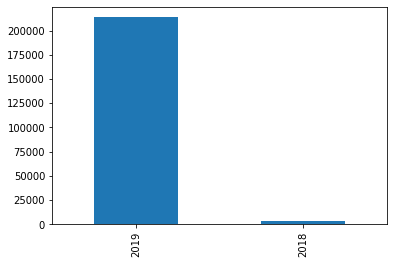

In [229]:
# Almost all reports on residential building are handled by HPD
HPD_df = df[df.agency == "HPD"]

#So compares the number of reports handled by HPD over the years
HPD_df.create_date_dtime.dt.year.value_counts().plot(kind='bar')

#But I need to further look up whether these complaints were from public housing. 
##To find it the data in here will be helpful(https://www1.nyc.gov/site/nycha/about/developments.page)

### Also, I need to see the federal funding amount to NYCHA over the years. 
##https://council.nyc.gov/budget/wp-content/uploads/sites/54/2021/03/NYCHA.pdf
##This document might be helpful, but it seems like the federal funding to NYCHA is increasing over five years...why?!